In [93]:
from collections import Counter
import re
from nltk.tokenize import TreebankWordTokenizer

## Предобработка

- Удалить из всех текстов символы/токены/части документов, которые затруднят классификацию.



In [7]:
fname_rus = "./udhr_txt/udhr_rus.txt"
fname_bel = "./udhr_txt/udhr_bel.txt"
fname_bul = "./udhr_txt/udhr_bul.txt"
fname_serb = "./udhr_txt/udhr_srp_cyrl.txt"
fname_tat = "./udhr_txt/udhr_tat.txt"
fname_ukr = "./udhr_txt/udhr_ukr.txt"
fname_kaz = "./udhr_txt/udhr_kaz.txt"


In [75]:
def preprocess(fname):
    
    with open(fname, encoding="utf-8") as fl:
        text = fl.read()
    
    words_filtered = []

    tokenizedWords = TreebankWordTokenizer().tokenize(text.lower())

    for wf in tokenizedWords:
        for w in re.findall(r'(\w+)', wf):
            for wtf in re.findall(r'(\D+)', w):
                words_filtered.append(wtf)
    
    return words_filtered[31:]

In [80]:
rus = preprocess(fname_rus)
bel = preprocess(fname_bel)
bulg = preprocess(fname_bul)
serb = preprocess(fname_serb)
tat = preprocess(fname_tat)
ukr = preprocess(fname_ukr)
kaz = preprocess(fname_kaz)

Собрать для каждого языка частотный список слов/биграмм/триграмм. Записать топ-300 в текстовый файл (по одному нграмму на строке, от более частого к менее частому).


In [98]:
#функция берет на вход список слов, а на выход отдает словарь, где уникальные слова - это ключи, 
#а количество вхождений слова - это значение

def text_to_dict(list_of_words):
        
    unique_words = list(set(list_of_words))

    numbers = []
    for item in unique_words:
        word_num = list_of_words.count(item)
        numbers.append(word_num)
    
    dictionary = dict(zip(unique_words, numbers))
    
    return dictionary

In [103]:
w_freq_rus = text_to_dict(rus)
w_freq_bel = text_to_dict(bel)
w_freq_bulg = text_to_dict(bulg)
w_freq_serb = text_to_dict(serb)
w_freq_tat = text_to_dict(tat)
w_freq_ukr = text_to_dict(ukr)
w_freq_kaz = text_to_dict(kaz)

Для каждого языка записываем в отдельный файл список 300 самых частотных слов

In [140]:
fl = open('rus.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_rus).most_common(300))[i][0] + '\n')

fl.close()

In [141]:
fl = open('bel.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_bel).most_common(300))[i][0] + '\n')

fl.close()

In [142]:
fl = open('bulg.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_bulg).most_common(300))[i][0] + '\n')

fl.close()

In [143]:
fl = open('serb.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_serb).most_common(300))[i][0] + '\n')

fl.close()

In [144]:
fl = open('tat.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_tat).most_common(300))[i][0] + '\n')

fl.close()

In [145]:
fl = open('ukr.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_ukr).most_common(300))[i][0] + '\n')

fl.close()

In [146]:
fl = open('kaz.txt', 'w')

for i in range(300):
    fl.write(list(Counter(w_freq_kaz).most_common(300))[i][0] + '\n')

fl.close()

Для каждого языка находим список 300 самых частотных триграммов и записываем в отдельный файл (до этого также нашли самые частотные биграммы)

In [173]:
n = 3

ngrams_rus = []
for word in rus:
    for i in range(len(word)-n+1):
        ngrams_rus.append(word[i:i+n])

bi_rus = text_to_dict(ngrams_rus)

fl = open('rus_trigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_rus).most_common(300))[i][0] + '\n')

fl.close()

In [174]:
n = 3

ngrams_bel = []
for word in bel:
    for i in range(len(word)-n+1):
        ngrams_bel.append(word[i:i+n])

bi_bel = text_to_dict(ngrams_bel)

fl = open('bel_trigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_bel).most_common(300))[i][0] + '\n')

fl.close()

In [175]:
n = 3

ngrams_bulg = []
for word in bulg:
    for i in range(len(word)-n+1):
        ngrams_bulg.append(word[i:i+n])

bi_bulg = text_to_dict(ngrams_bulg)

fl = open('bulg_trigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_bulg).most_common(300))[i][0] + '\n')

fl.close()

In [176]:
n = 3

ngrams_serb = []
for word in serb:
    for i in range(len(word)-n+1):
        ngrams_serb.append(word[i:i+n])

bi_serb = text_to_dict(ngrams_serb)

fl = open('serb_triigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_serb).most_common(300))[i][0] + '\n')

fl.close()

In [177]:
n = 3

ngrams_tat = []
for word in tat:
    for i in range(len(word)-n+1):
        ngrams_tat.append(word[i:i+n])

bi_tat = text_to_dict(ngrams_tat)

fl = open('tat_trigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_tat).most_common(300))[i][0] + '\n')

fl.close()

In [178]:
n = 3

ngrams_ukr = []
for word in ukr:
    for i in range(len(word)-n+1):
        ngrams_ukr.append(word[i:i+n])

bi_ukr = text_to_dict(ngrams_ukr)

fl = open('ukr_trigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_ukr).most_common(300))[i][0] + '\n')

fl.close()

In [179]:
n = 3

ngrams_kaz = []
for word in kaz:
    for i in range(len(word)-n+1):
        ngrams_kaz.append(word[i:i+n])

bi_kaz = text_to_dict(ngrams_kaz)

fl = open('kaz_trigram.txt', 'w')

for i in range(300):
    fl.write(list(Counter(bi_kaz).most_common(300))[i][0] + '\n')

fl.close()      

Построить матрицу схожести языков, визуализировать её. Схожесть считаем как объём пересечения полученных топов нграмм (сколько нграммов попали в оба топа?).
Какие языки оказались очень похожи друг на друга, а какие нет? Иными словами, какие языки проще различить по нграммам, а какие труднее? Интерпретируйте результат.


In [186]:
fname_rus_w = ('./langdetect_b_hw/words/rus.txt')
fname_bel_w = ('./langdetect_b_hw/words/bel.txt')
fname_bulg_w = ('./langdetect_b_hw/words/bulg.txt')
fname_serb_w = ('./langdetect_b_hw/words/serb.txt')
fname_tat_w = ('./langdetect_b_hw/words/tat.txt')
fname_ukr_w = ('./langdetect_b_hw/words/ukr.txt')
fname_kaz_w = ('./langdetect_b_hw/words/kaz.txt')

In [215]:
with open(fname_rus_w) as fl:
    rus_w = fl.read().split('\n')

with open(fname_bel_w) as fl:
    bel_w = fl.read().split('\n')

with open(fname_bulg_w) as fl:
    bulg_w = fl.read().split('\n')

with open(fname_serb_w) as fl:
    serb_w = fl.read().split('\n')

with open(fname_tat_w) as fl:
    tat_w = fl.read().split('\n')

with open(fname_kaz_w) as fl:
    kaz_w = fl.read().split('\n')

with open(fname_ukr_w) as fl:
    ukr_w = fl.read().split('\n')


Строим матрицу схожести языков по высокочастотным словам

In [268]:
import numpy as np

sim_matrix = np.zeros((7, 7), dtype=int)
text_list = [rus_w, bel_w, bulg_w, serb_w, tat_w, kaz_w, ukr_w]

for lst in text_list:
    for i in range(7):
        value = set(lst) & set(text_list[i])
        sim_matrix[text_list.index(lst)][i] = len(value) - 1

In [269]:
import pandas as pd

df_matrix = pd.DataFrame(sim_matrix)
df_matrix.columns = ['rus', 'bel', 'bulg', 'serb', 'tat', 'kaz', 'ukr']
df_matrix.index = ['rus', 'bel', 'bulg', 'serb', 'tat', 'kaz', 'ukr']
df_matrix

,rus,bel,bulg,serb,tat,kaz,ukr
rus,300,17,29,22,2,3,29
bel,17,300,7,8,1,2,22
bulg,29,7,300,28,1,2,14
serb,22,8,28,300,1,2,11
tat,2,1,1,1,300,8,0
kaz,3,2,2,2,8,300,1
ukr,29,22,14,11,0,1,300


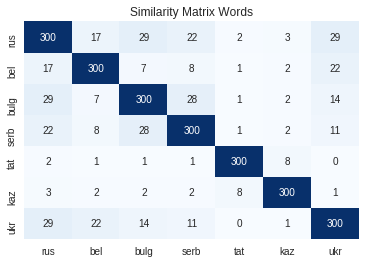

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(data=df_matrix, cmap = "Blues", annot=True, fmt = 'd', cbar=False)
plt.title("Similarity Matrix Words")
plt.show()


Строим матрицу схожести языков по биграммам

In [271]:
fname_rus_bi = ('./langdetect_b_hw/bigrams/rus_bigram.txt')
fname_bel_bi = ('./langdetect_b_hw/bigrams/bel_bigram.txt')
fname_bulg_bi = ('./langdetect_b_hw/bigrams/bulg_bigram.txt')
fname_serb_bi = ('./langdetect_b_hw/bigrams/serb_bigram.txt')
fname_tat_bi = ('./langdetect_b_hw/bigrams/tat_bigram.txt')
fname_ukr_bi = ('./langdetect_b_hw/bigrams/ukr_bigram.txt')
fname_kaz_bi = ('./langdetect_b_hw/bigrams/kaz_bigram.txt')

In [272]:
with open(fname_rus_bi) as fl:
    rus_bi = fl.read().split('\n')

with open(fname_bel_bi) as fl:
    bel_bi = fl.read().split('\n')

with open(fname_bulg_bi) as fl:
    bulg_bi = fl.read().split('\n')

with open(fname_serb_bi) as fl:
    serb_bi = fl.read().split('\n')

with open(fname_tat_bi) as fl:
    tat_bi = fl.read().split('\n')

with open(fname_kaz_bi) as fl:
    kaz_bi = fl.read().split('\n')

with open(fname_ukr_bi) as fl:
    ukr_bi = fl.read().split('\n')

In [265]:
bi_matrix = np.zeros((7, 7), dtype=int)
bi_list = [rus_bi, bel_bi, bulg_bi, serb_bi, tat_bi, kaz_bi, ukr_bi]

for lst in bi_list:
    for i in range(7):
        bi_value = set(lst) & set(bi_list[i])
        bi_matrix[bi_list.index(lst)][i] = len(bi_value) - 1

In [266]:
df_bi_matrix = pd.DataFrame(bi_matrix)
df_bi_matrix.columns = ['rus', 'bel', 'bulg', 'serb', 'tat', 'kaz', 'ukr']
df_bi_matrix.index = ['rus', 'bel', 'bulg', 'serb', 'tat', 'kaz', 'ukr']
df_bi_matrix

,rus,bel,bulg,serb,tat,kaz,ukr
rus,300,180,233,194,153,128,210
bel,180,300,159,144,125,123,187
bulg,233,159,300,209,138,119,198
serb,194,144,209,300,132,112,181
tat,153,125,138,132,300,164,128
kaz,128,123,119,112,164,300,120
ukr,210,187,198,181,128,120,300


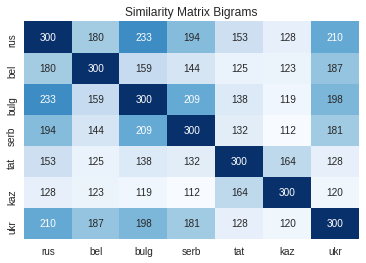

In [284]:
sns.heatmap(data=df_bi_matrix, cmap = "Blues", annot=True, fmt="d", cbar=False)
plt.title("Similarity Matrix Bigrams")
plt.show()

Строим матрицу схожести языков по триграммам

In [274]:
fname_rus_tri = ('./langdetect_b_hw/trigrams/rus_trigram.txt')
fname_bel_tri = ('./langdetect_b_hw/trigrams/bel_trigram.txt')
fname_bulg_tri = ('./langdetect_b_hw/trigrams/bulg_trigram.txt')
fname_serb_tri = ('./langdetect_b_hw/trigrams/serb_triigram.txt')
fname_tat_tri = ('./langdetect_b_hw/trigrams/tat_trigram.txt')
fname_ukr_tri = ('./langdetect_b_hw/trigrams/ukr_trigram.txt')
fname_kaz_tri = ('./langdetect_b_hw/trigrams/kaz_trigram.txt')

In [275]:
with open(fname_rus_tri) as fl:
    rus_tri = fl.read().split('\n')

with open(fname_bel_tri) as fl:
    bel_tri = fl.read().split('\n')

with open(fname_bulg_tri) as fl:
    bulg_tri = fl.read().split('\n')

with open(fname_serb_tri) as fl:
    serb_tri = fl.read().split('\n')

with open(fname_tat_tri) as fl:
    tat_tri = fl.read().split('\n')

with open(fname_kaz_tri) as fl:
    kaz_tri = fl.read().split('\n')

with open(fname_ukr_tri) as fl:
    ukr_tri = fl.read().split('\n')

In [276]:
tri_matrix = np.zeros((7, 7), dtype=int)
tri_list = [rus_tri, bel_tri, bulg_tri, serb_tri, tat_tri, kaz_tri, ukr_tri]

for lst in tri_list:
    for i in range(7):
        tri_value = set(lst) & set(tri_list[i])
        tri_matrix[tri_list.index(lst)][i] = len(tri_value) - 1

In [277]:
df_tri_matrix = pd.DataFrame(tri_matrix)
df_tri_matrix.columns = ['rus', 'bel', 'bulg', 'serb', 'tat', 'kaz', 'ukr']
df_tri_matrix.index = ['rus', 'bel', 'bulg', 'serb', 'tat', 'kaz', 'ukr']
df_tri_matrix

,rus,bel,bulg,serb,tat,kaz,ukr
rus,300,65,168,119,38,22,120
bel,65,300,53,52,31,26,83
bulg,168,53,300,122,33,22,92
serb,119,52,122,300,22,20,87
tat,38,31,33,22,300,64,32
kaz,22,26,22,20,64,300,23
ukr,120,83,92,87,32,23,300


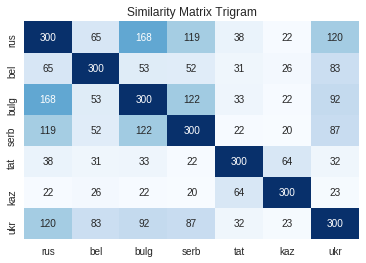

In [285]:
sns.heatmap(data=df_tri_matrix, cmap = "Blues", annot=True, fmt="d", cbar=False)
plt.title("Similarity Matrix Trigram")
plt.show()